# Springboard Data Science Career Track

## Objectives

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***

A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas


## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [2]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [3]:
properties.shape
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [4]:
# each row needs to represent a borough
# each column needs to contain data about that borough at a certain point in time
properties_T = properties.T
properties_T.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [5]:
# Check
properties_T.head()

,0,1,2,3,4,5,6,7,8,9,...,296,297,298,299,300,301,302,303,304,305
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,104473,...,813770,810455,826227,776894,737275,747611,777640,844989,867841,899831
Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,...,299421,304778,304579,306390,301283,303653,304265,304099,283139,295744
Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,...,528577,526670,525678,522639,519306,518542,519121,527747,526553,532503
Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,64509.5,...,337523,333340,332920,333657,336302,334765,337760,339215,346840,339408


In [6]:
# reset the index
properties_T = properties_T.reset_index()
properties_T.index

RangeIndex(start=0, stop=49, step=1)

In [7]:
# Check
properties_T.head()

,index,0,1,2,3,4,5,6,7,8,...,296,297,298,299,300,301,302,303,304,305
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,813770,810455,826227,776894,737275,747611,777640,844989,867841,899831
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,299421,304778,304579,306390,301283,303653,304265,304099,283139,295744
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,528577,526670,525678,522639,519306,518542,519121,527747,526553,532503
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337523,333340,332920,333657,336302,334765,337760,339215,346840,339408


In [8]:
# Set the corresponding name of columns 
## Check the columns
properties_T.columns

## Assign the first row as name of columns
properties_T.iloc[[0]]
properties_T.columns = properties_T.iloc[0]

## Drop the first row
properties_T = properties_T.drop(0)

In [9]:
# Check
properties_T.head(10)

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,813770,810455,826227,776894,737275,747611,777640,844989,867841,899831
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,299421,304778,304579,306390,301283,303653,304265,304099,283139,295744
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,528577,526670,525678,522639,519306,518542,519121,527747,526553,532503
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337523,333340,332920,333657,336302,334765,337760,339215,346840,339408
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,488784,501533,494770,432188,427126,423161,467145,461398,494455,466574
6,Bromley,E09000006,81671.5,81657.6,81449.3,81124.4,81542.6,82382.8,82898.5,82054.4,...,442189,441058,439178,436080,438682,435532,435704,434625,443482,420036
7,Camden,E09000007,120933,119509,120282,120098,119929,121887,124028,125530,...,863171,838170,804713,825336,807124,815512,825249,870107,870627,862209
8,Croydon,E09000008,69158.2,68951.1,68712.4,68610,68844.9,69052.5,69142.5,68993.4,...,364540,365226,364413,367585,369568,371227,371357,370872,386738,369791
9,Ealing,E09000009,79885.9,80897.1,81379.9,82188.9,82077.1,81630.7,82352.2,82706.7,...,474627,473162,477369,475492,469662,466491,465614,478565,502107,490596
10,Enfield,E09000010,72514.7,73155.2,72190.4,71442.9,70630.8,71348.3,71837.5,72237.9,...,393033,386806,392721,393255,400182,390589,389901,395082,400695,408018


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [10]:
# Rename inappropriate column names
properties_T = properties_T.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})
properties_T.columns

Index([   'London_Borough',                'ID', 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2019-08-01 00:00:00, 2019-09-01 00:00:00, 2019-10-01 00:00:00,
       2019-11-01 00:00:00, 2019-12-01 00:00:00, 2020-01-01 00:00:00,
       2020-02-01 00:00:00, 2020-03-01 00:00:00, 2020-04-01 00:00:00,
       2020-05-01 00:00:00],
      dtype='object', name=0, length=307)

In [11]:
# Check
properties_T.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,813770,810455,826227,776894,737275,747611,777640,844989,867841,899831
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,299421,304778,304579,306390,301283,303653,304265,304099,283139,295744
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,528577,526670,525678,522639,519306,518542,519121,527747,526553,532503
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,337523,333340,332920,333657,336302,334765,337760,339215,346840,339408
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,488784,501533,494770,432188,427126,423161,467145,461398,494455,466574


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [12]:
# Reduce the columns by meltiing the dataframe
clean_properties= pd.melt(properties_T, id_vars= ['London_Borough', 'ID'])
# Re-name inappropriate column names
clean_properties = clean_properties.rename(columns = {0: 'Month', 'value': 'Average_price'})

# Check
clean_properties.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [13]:
# Check the data types of clean_properties DataFrame:
clean_properties.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price             object
dtype: object

In [14]:
# Change the Average_price column to a numeric type
clean_properties['Average_price'] = pd.to_numeric(clean_properties['Average_price'])
clean_properties.dtypes 

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price            float64
dtype: object

In [15]:
# Check
clean_properties.count()

London_Borough    14640
ID                13725
Month             14640
Average_price     13725
dtype: int64

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [16]:
len(clean_properties['London_Borough'].unique())

48

In [17]:
clean_properties['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [18]:
# Check 'Unnamed: 34' and 'Unnamed: 37'
clean_properties[clean_properties['London_Borough'] == 'Unnamed: 34'].head()
clean_properties[clean_properties['London_Borough'] == 'Unnamed: 37'].head()

# Check the rows with NaN 
clean_properties[clean_properties['ID'].isna()]

,London_Borough,ID,Month,Average_price
33,Unnamed: 34,NaN,1995-01-01,NaN
36,Unnamed: 37,NaN,1995-01-01,NaN
46,Unnamed: 47,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
...,...,...,...,...
14580,Unnamed: 37,NaN,2020-04-01,NaN
14590,Unnamed: 47,NaN,2020-04-01,NaN
14625,Unnamed: 34,NaN,2020-05-01,NaN
14628,Unnamed: 37,NaN,2020-05-01,NaN


In [19]:
NaNFreeDF2 = clean_properties.dropna()
# NaNFreeDF1.head(48)
# Check
NaNFreeDF2.count()

London_Borough    13725
ID                13725
Month             13725
Average_price     13725
dtype: int64

In [20]:
# Check
print(clean_properties.shape)
print(NaNFreeDF2.shape) 

(14640, 4)
(13725, 4)


In [21]:
# A list of non-boroughs. 
nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

# Remove non-boroughs from the Data Frame
NaNFreeDF2 = NaNFreeDF2[~NaNFreeDF2.London_Borough.isin(nonBoroughs)]

# Check
print(NaNFreeDF2.shape)

(10065, 4)


In [22]:
# Final, analysis-ready DataFrame
df = NaNFreeDF2
df

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
...,...,...,...,...
14620,Sutton,E09000029,2020-05-01,376154.73580
14621,Tower Hamlets,E09000030,2020-05-01,498227.83990
14622,Waltham Forest,E09000031,2020-05-01,443509.79640
14623,Wandsworth,E09000032,2020-05-01,615207.17390


**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

Text(0, 0.5, 'Price')

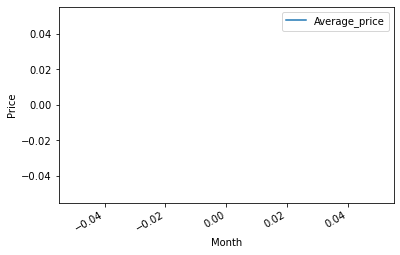

In [23]:
# a line plot of Month against Average Price
LONDON_prices = df[df['London_Borough'] == 'LONDON']
ax = LONDON_prices.plot(kind ='line', x = 'Month', y='Average_price')
ax.set_ylabel('Price')

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [24]:
# Extract the year from each individual value in 'Month' column
df['Year'] = df['Month'].apply(lambda t: t.year)
# Calculate the mean for each year and for each Borough
dfg = df.groupby(by=['London_Borough', 'Year']).mean()
dfg = dfg.reset_index()

# Check 
dfg.head()

,London_Borough,Year,Average_price
0,Barking & Dagenham,1995,51817.969390
1,Barking & Dagenham,1996,51718.192690
2,Barking & Dagenham,1997,55974.262309
3,Barking & Dagenham,1998,60285.821083
4,Barking & Dagenham,1999,65320.934441


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [25]:

def create_price_ratio(d):
    y1998 = float(d['Average_price'][d['Year']==1998])
    y2018 = float(d['Average_price'][d['Year']==2018])
    ratio = [y1998/y2018]
    return ratio

# where we'll store our ratios for each unique London_Borough.
final = {}

for b in dfg['London_Borough'].unique():
    borough = dfg[dfg['London_Borough'] == b]
    final[b] = create_price_ratio(borough)

print(final) 


{'Barking & Dagenham': [0.20422256235393685], 'Barnet': [0.22945274120785797], 'Bexley': [0.2353507654063011], 'Brent': [0.2043086864360114], 'Bromley': [0.24421308489837312], 'Camden': [0.20261973503252542], 'City of London': [0.18862157770244367], 'Croydon': [0.23803288028014047], 'Ealing': [0.23194048191708755], 'Enfield': [0.23455064269011863], 'Greenwich': [0.20995010893854218], 'Hackney': [0.16133493530705734], 'Hammersmith & Fulham': [0.24167443054605853], 'Haringey': [0.19475619095546956], 'Harrow': [0.24635417785626296], 'Havering': [0.23120155787014757], 'Hillingdon': [0.23807975835429931], 'Hounslow': [0.25148317824115635], 'Islington': [0.20643891170300285], 'Kensington & Chelsea': [0.19675491852791563], 'Kingston upon Thames': [0.23416190234282552], 'Lambeth': [0.20170435486140822], 'Lewisham': [0.1835124676472171], 'Merton': [0.21091380604361798], 'Newham': [0.18848754146121072], 'Redbridge': [0.2236545053715767], 'Richmond upon Thames': [0.24967779731157863], 'Southwark'

In [26]:
# Assign 'df_ratios' the result of calling the DataFrame method on the dictionary final. 
df_ratios = pd.DataFrame(final)

# Check 
df_ratios.head()


,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
0,0.204223,0.229453,0.235351,0.204309,0.244213,0.20262,0.188622,0.238033,0.23194,0.234551,...,0.210914,0.188488,0.223655,0.249678,0.181275,0.242806,0.216137,0.171387,0.210185,0.186791


In [27]:
# Transpose and reset the index 
df_ratios_T = df_ratios.T
df_ratios = df_ratios_T.reset_index()
df_ratios.head()

# Rename the 'index' column as 'London_Borough', and the '0' column to '2018'.
df_ratios.rename(columns={'index':'Borough', 0:'2018'}, inplace=True)
df_ratios.head()

,Borough,2018
0,Barking & Dagenham,0.204223
1,Barnet,0.229453
2,Bexley,0.235351
3,Brent,0.204309
4,Bromley,0.244213


                 Borough      2018
17              Hounslow  0.251483
26  Richmond upon Thames  0.249678
14                Harrow  0.246354
4                Bromley  0.244213
28                Sutton  0.242806
12  Hammersmith & Fulham  0.241674
16            Hillingdon  0.238080
7                Croydon  0.238033
2                 Bexley  0.235351
9                Enfield  0.234551
20  Kingston upon Thames  0.234162
8                 Ealing  0.231940
15              Havering  0.231202
1                 Barnet  0.229453
25             Redbridge  0.223655


[Text(-0.06, 0, 'Hounslow'),
 Text(-0.039999999999999994, 0, 'Richmond upon Thames'),
 Text(-0.019999999999999997, 0, 'Harrow'),
 Text(0.0, 0, 'Bromley'),
 Text(0.020000000000000004, 0, 'Sutton'),
 Text(0.04000000000000001, 0, 'Hammersmith & Fulham'),
 Text(0.06, 0, 'Hillingdon')]

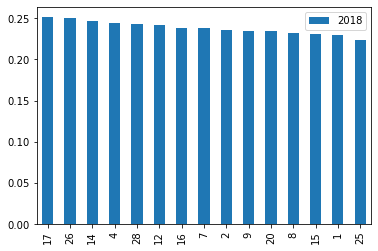

In [28]:
# Sort in descending order and select the top 15 boroughs.
top15 = df_ratios.sort_values(by='2018',ascending=False).head(15)
print(top15)

# Plot the boroughs that have seen the greatest changes in price.
kind = top15[['Borough','2018']].plot(kind='bar')

ax.set_xticklabels(top15.Borough)

                 Borough      2018
11               Hackney  0.161335
30        Waltham Forest  0.171387
27             Southwark  0.181275
22              Lewisham  0.183512
32           Westminster  0.186791
24                Newham  0.188488
6         City of London  0.188622
13              Haringey  0.194756
19  Kensington & Chelsea  0.196755
21               Lambeth  0.201704
5                 Camden  0.202620
0     Barking & Dagenham  0.204223
3                  Brent  0.204309
18             Islington  0.206439
10             Greenwich  0.209950


[Text(-0.06, 0, 'Hackney'),
 Text(-0.039999999999999994, 0, 'Waltham Forest'),
 Text(-0.019999999999999997, 0, 'Southwark'),
 Text(0.0, 0, 'Lewisham'),
 Text(0.020000000000000004, 0, 'Westminster'),
 Text(0.04000000000000001, 0, 'Newham'),
 Text(0.06, 0, 'City of London')]

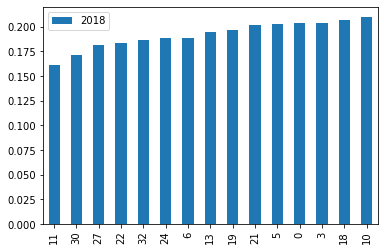

In [29]:
# Sort in ascending order and select the bottom 17 boroughs. (rest)
bottom17 = df_ratios.sort_values(by='2018',ascending=True).head(15)
print(bottom17)

# Plot the boroughs
kind = bottom17[['Borough','2018']].plot(kind='bar')

ax.set_xticklabels(bottom17.Borough)

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 